# OBESITY RISK PREDICTION 🍰
# XGB, Stacking Classifier (Ensemble), EDA 📊

This notebook covers the steps of defining, analyzing, and engineering variables, starting with loading and examining the dataset. We will also examine relationships and cause-effect relationships between variables before moving on to Exploratory Data Analysis (EDA) and visualization.

### Table of Contents:
* <b><span style='color: #f5ad9f'> 1.</span> Load and Check the Data</b>

* <b><span style='color: #f5ad9f'> 2.</span> Varibale Description</b>

* <b><span style='color: #f5ad9f'> 3.</span> Variable Analysis</b>
    * <b><span style='color: #9ed4db'> 3.1</span> Target Variable</b>
    * <b><span style='color: #9ed4db'> 3.2</span> Univariate Variable Analysis</b>
    

* <b><span style='color: #f5ad9f'> 4.</span> Feature Engineering</b>

    * <b><span style='color: #9ed4db'> 4.1</span> Categorical Variables</b>
    * <b><span style='color: #9ed4db'> 4.2</span> Target Variable</b>
    * <b><span style='color: #9ed4db'> 4.3</span> New Features</b>
    

* <b><span style='color: #f5ad9f'> 5.</span> EDA (Visualization, Bivariate and Multivariate Analysis)</b>

    * <b><span style='color: #9ed4db'> 5.1</span> Correlation</b>
    * <b><span style='color: #9ed4db'> 5.2</span> Causation</b>
    

* <b><span style='color: #f5ad9f'> 6.</span> Preprocessing (One-Hot-Encoder and Standard Scaler)</b>
    
* <b><span style='color: #f5ad9f'> 7.</span> Model Development</b>

    * <b><span style='color: #9ed4db'> 7.1</span> Load the Libraries</b>
    * <b><span style='color: #9ed4db'> 7.2</span> LGBM Classifier (hypermeter tuning)</b>
    * <b><span style='color: #9ed4db'> 7.3</span> XGB Classifier (hypermeter tuning)</b>
    * <b><span style='color: #9ed4db'> 7.4</span> CatBoost Classifier (hypermeter tuning)</b>
    * <b><span style='color: #9ed4db'> 7.5</span> Stacking Classifier</b>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Pastel1")

import warnings as wr
wr.filterwarnings('ignore')

# <b><span style='color: #f5ad9f'> 1|</span> Load and Check the Data</b>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/obesity-or-cvd-risk-classifyregressorcluster


In [ ]:
df = pd.read_csv(path + "/ObesityDataSet.csv")

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


# <b><span style='color: #f5ad9f'> 2|</span> Variable Description</b>

* Gender: Sex (Male/Female)
* Age: Age
* Height: Height
* Weight: Kilogram
* family_history_with_overweight: Family history of obesity
* FAVC: Frequent consumption of high caloric food
* FCVC: Frequency of consumption of vegetables
* NCP: Number of main meals.
* CAEC:  Consumption of food between meals.
* SMOKE: Smoking status
* CH2O: Daily water consumption
* SCC: Calories consumption monitoring
* FAF: Physical activity frequency
* TUE: Daily screen time
* CALC: Consumption of alcohol
* MTRANS: Transport type
* NObeyesdad: Obesity level

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# <b><span style='color: #f5ad9f'> 3|</span> Variable Analysis</b>

In this section, we will generally examine and visualize numerical and categorical data.

* Target Variable
* Univariate Variable Analysis
   * Categorical
   * Numerical

## <b><span style='color: #9ed4db'> 3.1|</span> Target Variable</b>

In [ ]:
label_counts = df["NObeyesdad"].value_counts()
label_counts

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


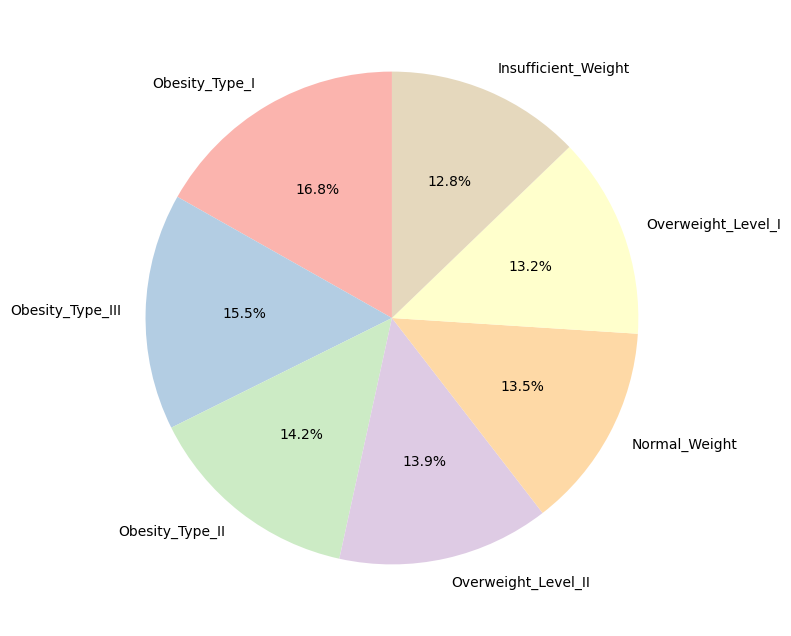

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

📌 Obesity_Type_III is the most frequent class in the data set compared to other obesity levels, and Overweight_Level_I is the least frequent class. Although there is a big difference between these two classes, in general there is not a big difference between all classes.

## <b><span style='color: #9ed4db'> 3.2|</span> Univariate Variable Analysis</b>

* **Categorical Variables :**  Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS

* **Numerical Variables :** Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

### <b><span style='color: #96c93b'> 3.2.1|</span> Categorical Variables</b>

In [ ]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [ ]:
df[categorical_cols].nunique()

,0
Gender,2
family_history_with_overweight,2
FAVC,2
CAEC,4
SMOKE,2
SCC,2
CALC,4
MTRANS,5


In [ ]:
def bar_plot(variable):

    # get feature
    var = df[variable]
    # count number of categorical variable (value/ simple)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize =(5,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

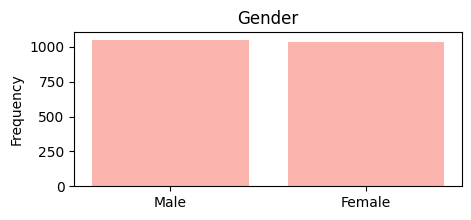

Gender: 
 Gender
Male      1052
Female    1035
Name: count, dtype: int64


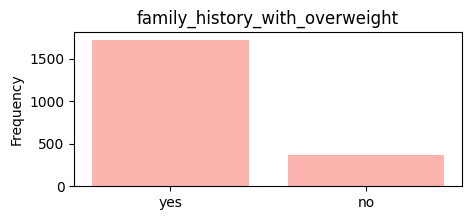

family_history_with_overweight: 
 family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64


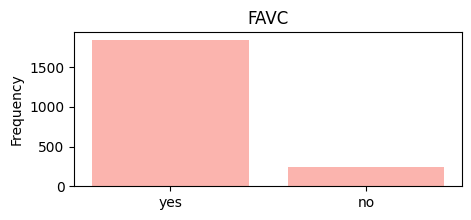

FAVC: 
 FAVC
yes    1844
no      243
Name: count, dtype: int64


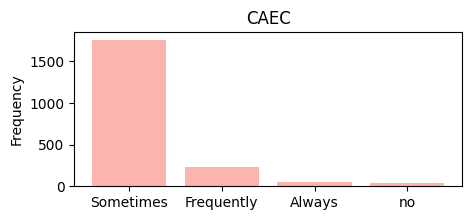

CAEC: 
 CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64


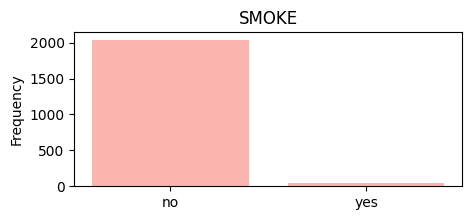

SMOKE: 
 SMOKE
no     2043
yes      44
Name: count, dtype: int64


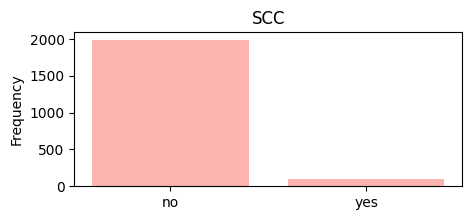

SCC: 
 SCC
no     1991
yes      96
Name: count, dtype: int64


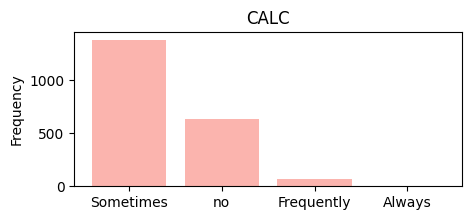

CALC: 
 CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64


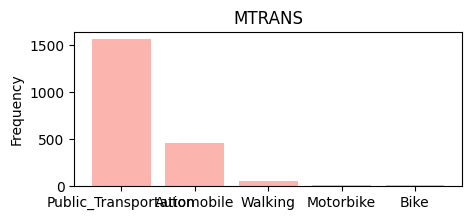

MTRANS: 
 MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64


In [ ]:
for c in categorical_cols:
    bar_plot(c)

### <b><span style='color: #96c93b'> 3.2.2|</span> Numerical Variables</b>

In [ ]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (5,2))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} disribution with hist".format(variable))
    plt.show()

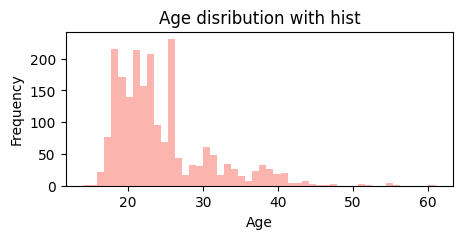

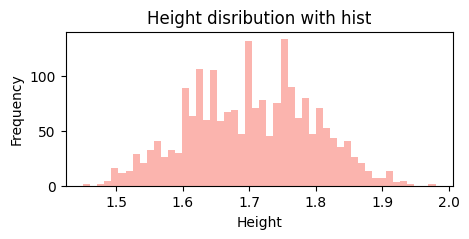

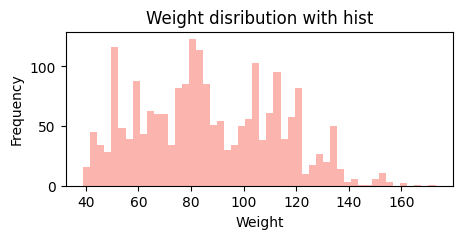

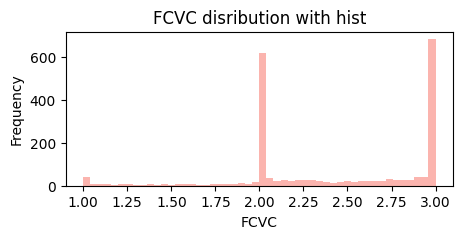

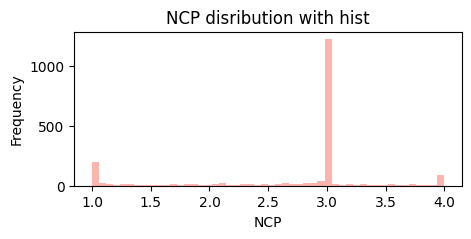

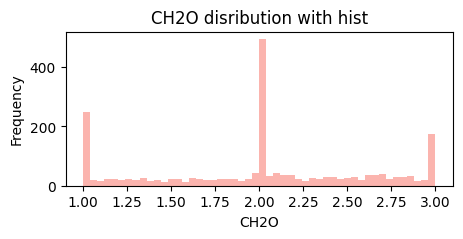

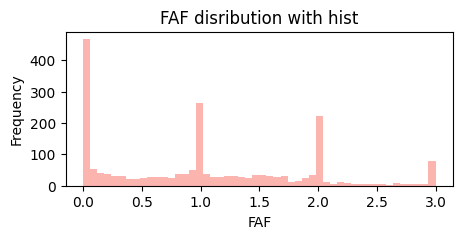

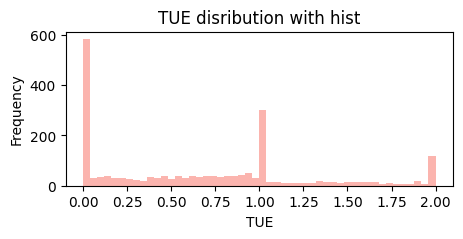

In [ ]:
for n in numeric_cols:
    plot_hist(n)

📌 As seen from the histograms, there is a significant difference in some specific numbers in the FCVC, NCP, CH2O, FAF and TUE features. Therefore, data binning can be done for these features.

#### ❗️❗️I made binning for the features I gave above in my previous notebook. However, I deleted it because it made the results worse. ❗️❗️

# <b><span style='color: #f5ad9f'> 4|</span> Feature Engineering</b>

* Categorical Variables
* Target Variable
* New Features

## <b><span style='color: #9ed4db'> 4.1|</span> Categorical Variables</b>

In [ ]:
df['Gender'] = [1 if i == 'Male' else 0 for i in df['Gender']]

In [ ]:
df['family_history_with_overweight'] = [1 if i == 'yes' else 0 for i in df['family_history_with_overweight']]

In [ ]:
df['FAVC'] = [1 if i == 'yes' else 0 for i in df['FAVC']]

In [ ]:
df['CAEC'] = [3 if i == 'Sometimes' else 2 if i == 'Frequently' else 1 if i == 'Always' else 0 for i in df['CAEC']]

In [ ]:
df['SMOKE'] = [1 if i == 'yes' else 0 for i in df['SMOKE']]

In [ ]:
df['SCC'] = [1 if i == 'yes' else 0 for i in df['SCC']]

In [ ]:
df['CALC'] = [3 if i == 'Sometimes' else 2 if i == 'Frequently' else 1 if i == 'Always' else 0 for i in df['CALC']]

In [ ]:
df['MTRANS'] = [4 if i == 'Public_Transportation' else 3 if i == 'Automobile' else 2 if i == 'Walking' else 1 if i == 'Motorbike' else 0 for i in df['MTRANS']]

## <b><span style='color: #9ed4db'> 4.2|</span> Target Variable</b>

In [ ]:
df['NObeyesdad'] = [6 if i == 'Obesity_Type_III' else 5 if i == 'Obesity_Type_II' else 4 if i == 'Obesity_Type_I' else 3 if i == 'Overweight_Level_II' else 2 if i == 'Overweight_Level_I' else 1 if i == 'Normal_Weight' else 0 for i in df['NObeyesdad']]

## <b><span style='color: #9ed4db'> 4.3|</span> New Features</b>

* BMI (Weight / (Height **2))
* Activity Level (FAF- TUE)
* water_dif (The difference between the amount of water that should be drunk daily and the amount of water that is drunk)
* Consumption_meals (FCVC + FAVC + CAEC)


In [ ]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [ ]:
df['Activity_level'] = df['FAF'] - df['TUE']

In [ ]:
# The difference between the amount of water that should be drunk daily and the amount of water that is drunk
df['water_dif'] = (df['Weight']* 0.033)- df['CH2O']

In [ ]:
df['Consumption_meals'] = (df['FCVC'] + df['FAVC'] + df['CAEC'])




In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Activity_level,water_dif,Consumption_meals
0,0,21.0,1.62,64.0,1,0,2.0,3.0,3,0,2.0,0,0.0,1.0,0,4,1,24.386526,-1.0,0.1120,5.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,3,1,3.0,1,3.0,0.0,3,4,1,24.238227,3.0,-1.1520,6.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,3,0,2.0,0,2.0,1.0,2,4,1,23.765432,1.0,0.5410,5.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,3,0,2.0,0,2.0,0.0,2,2,2,26.851852,2.0,0.8710,6.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,3,0,2.0,0,0.0,0.0,3,4,3,28.342381,0.0,0.9634,5.0


# <b><span style='color: #f5ad9f'> 5|</span> EDA</b>

We examined categorical and numerical data in the Variable Analysis section. In this section, we will analyze correlation and causation between features and make visualizations.



## <b><span style='color: #9ed4db'> 5.1|</span> Correlation</b>

In [ ]:
corr = df.corr()
corr

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Activity_level,water_dif,Consumption_meals
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.037442,0.045501,0.095129,-0.102435,0.189471,0.022356,-0.033522,-0.163893,-0.031920,-0.054737,0.145424,0.087535,-0.116685
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.117235,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,0.010163,-0.406769,0.279231,0.240769,0.056691,0.208470,0.106225
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.110783,0.054326,0.220487,-0.137078,0.293584,0.041808,0.130644,-0.079472,0.124863,0.124466,0.221054,0.274990,0.111759
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.328176,0.024369,0.203823,-0.205409,-0.056490,-0.079351,0.264586,0.092508,0.912453,0.934494,0.000044,0.779191,0.438758
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.277385,0.014885,0.168627,-0.193947,-0.062937,0.002314,-0.019592,-0.001433,0.503374,0.483648,-0.054122,0.340487,0.274680
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.167833,-0.050713,0.002993,-0.191277,-0.111184,0.071505,0.128040,0.100685,0.249927,0.247368,-0.135867,0.247933,0.451728
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,0.045500,0.013716,0.081332,0.071179,0.022003,-0.104128,0.083930,0.052807,0.228591,0.265082,0.080614,0.144944,0.619055
NCP,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,0.002716,0.005009,0.075335,-0.020461,0.127816,0.015693,0.112404,-0.046632,0.011034,0.027936,0.097737,0.035595,0.020339
CAEC,0.037442,0.117235,0.110783,0.328176,0.277385,0.167833,0.045500,0.002716,1.000000,-0.049275,-0.005968,-0.172619,-0.054459,0.041387,0.053935,0.011446,0.362459,0.333723,-0.070349,0.302358,0.728429
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.049275,1.000000,-0.031642,0.047384,0.010811,0.016491,0.040752,-0.027561,0.001984,-0.002022,-0.000787,0.042426,-0.041587


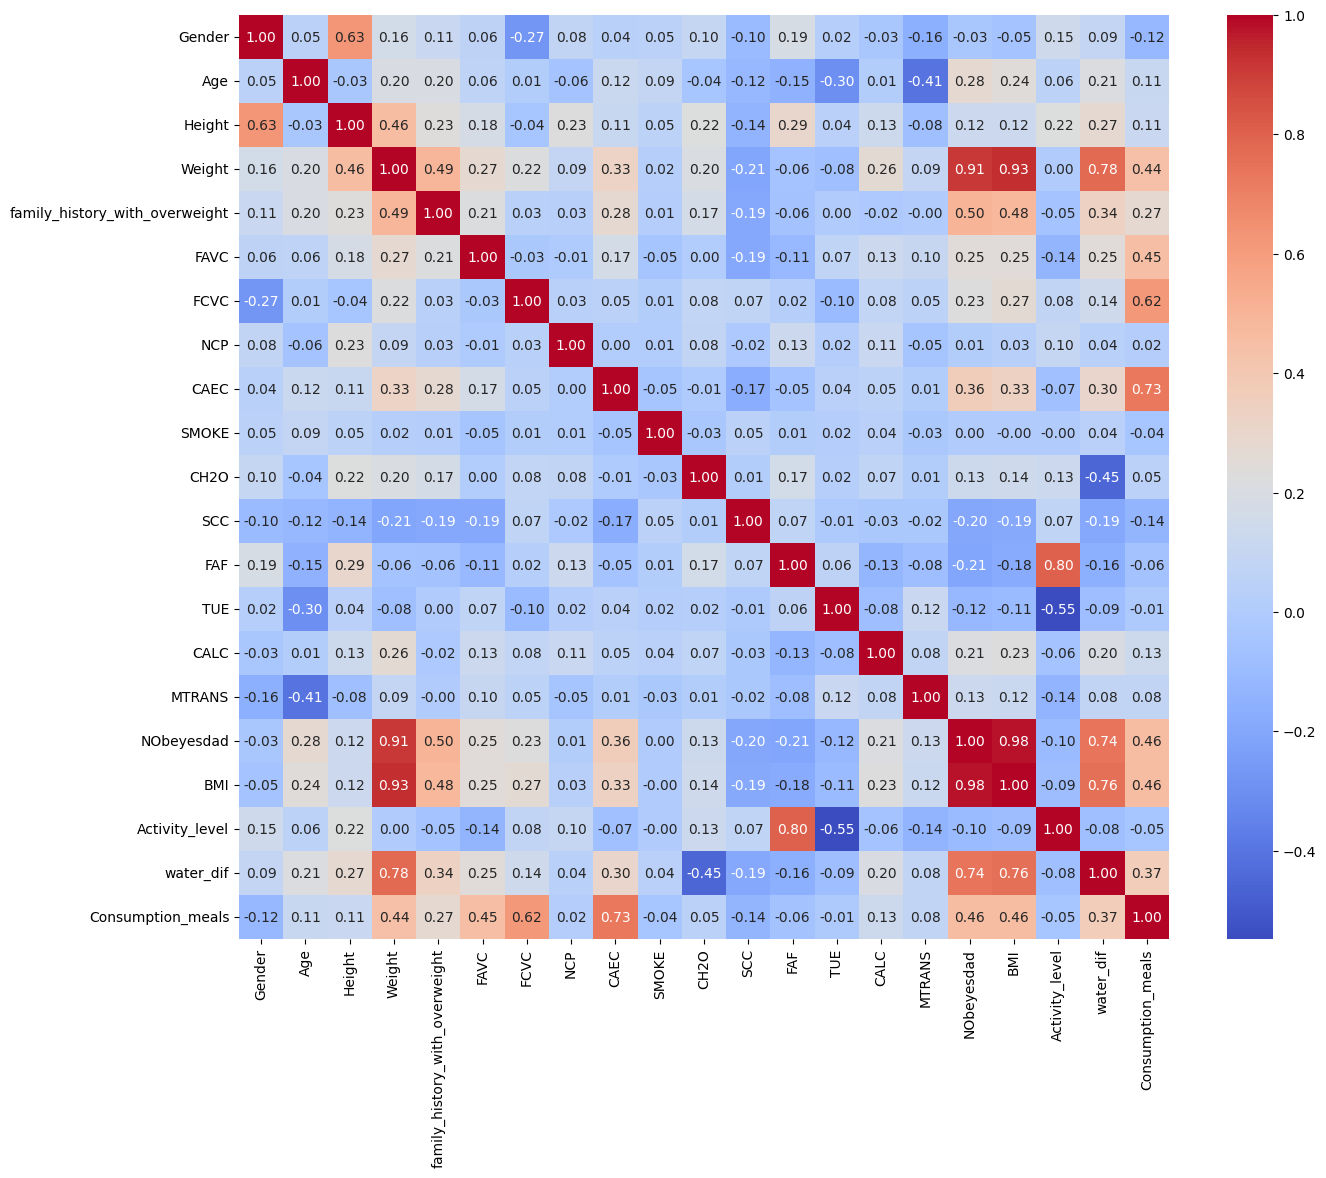

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.show()

📌 Looking at the correlation, the features that have a

🔹 **Positive correlation with the obesity level are:**

<b><span style='color: #96c93b'> 1|</span>(between %100 and %30) </b>

* BMI
* Weight
* family_history_with_overweight
* water_dif
* CAEC
* Consumption_meals
* age

<b><span style='color: #96c93b'> 2|</span>(between %30 and %20) </b>

* FAVC
* FCVC
* CH2O
* CALC

🔹 **Negative correlation with the obesity level are:**
* SCC
* FAF

### <b><span style='color: #96c93b'> |</span> BMI - family_history_with_overweight</b>

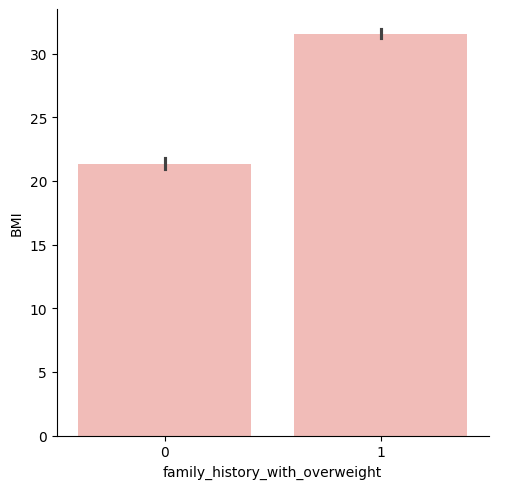

In [ ]:
g = sns.catplot(x = 'family_history_with_overweight', y = 'BMI', data = df, kind = 'bar')
g.set_ylabels('BMI')
plt.show()

📌 We see that those with obesity in their family have a higher body mass index.

### <b><span style='color: #96c93b'> |</span> FAVC - NObeyesdad </b>

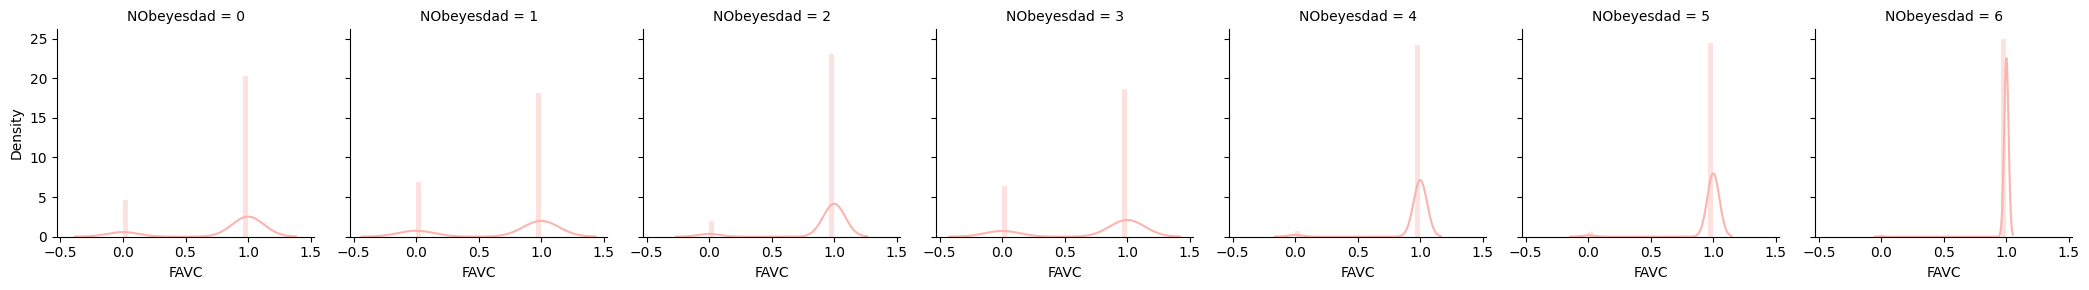

In [ ]:
g = sns.FacetGrid(df, col = 'NObeyesdad')
g.map(sns.distplot, 'FAVC', bins = 25)
plt.show()

📌 Except for the Obesity_Type_III type, there doesn't seem to be a big difference for the others. However, in Obesity_Type_III you can see a significant increase in those eating high-calorie foods.

📌 You can see a similar graph if you make it for the Consumption_meals feature.

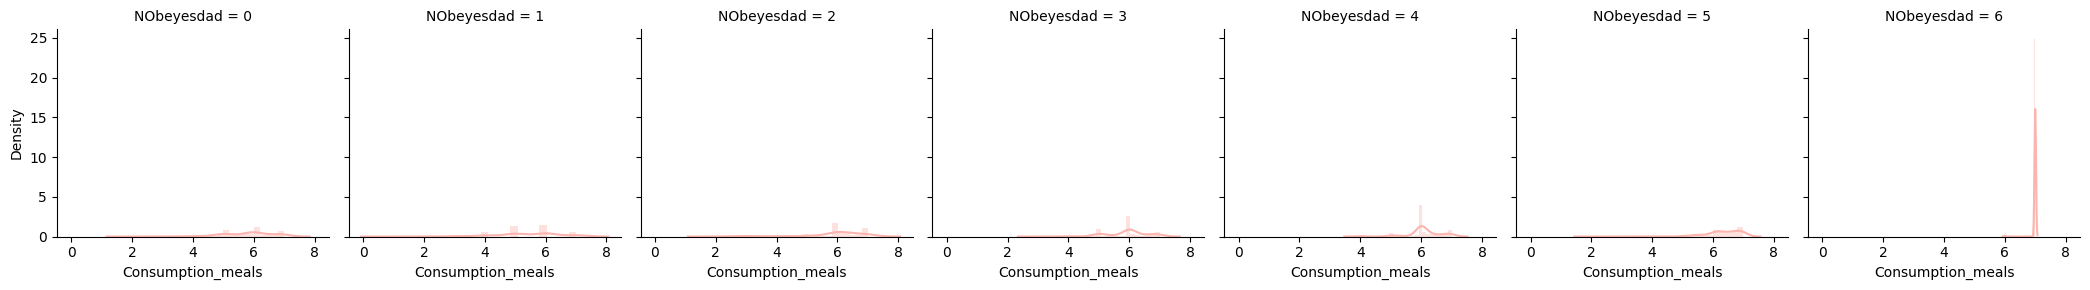

In [ ]:
g = sns.FacetGrid(df, col = 'NObeyesdad')
g.map(sns.distplot, 'Consumption_meals', bins = 25)
plt.show()

### <b><span style='color: #96c93b'> |</span> Age - NObeyesdad </b>

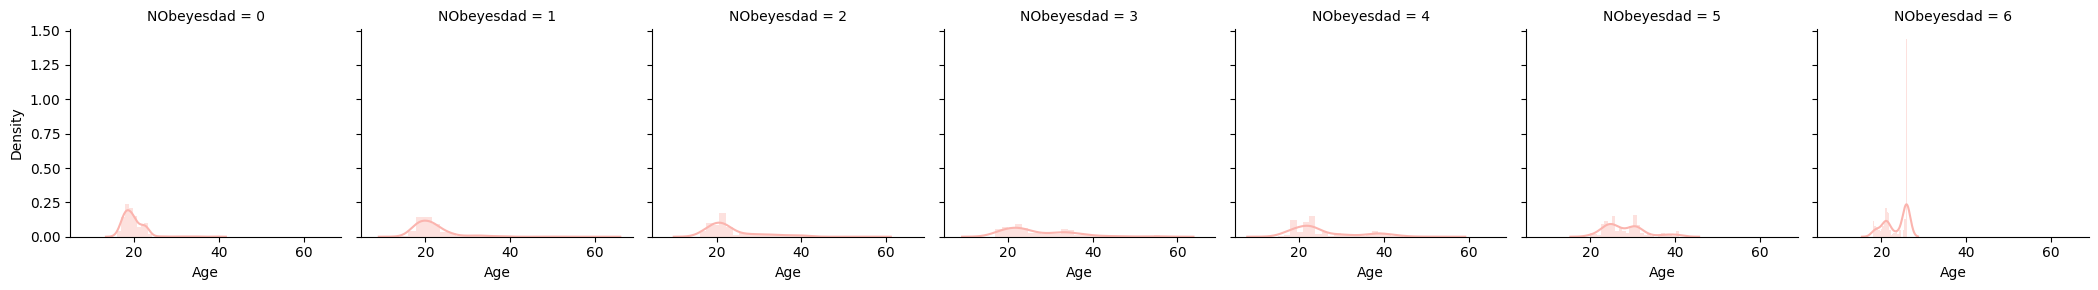

In [ ]:
g = sns.FacetGrid(df, col = 'NObeyesdad')
g.map(sns.distplot, 'Age', bins = 25)
plt.show()

📌 **NOTES:** 📌

* People with insufficient weight, normal weight and Overweight Level I are clustered around the age of 20.

* People with Overweight_Level_II are usually between the ages of 20 and 40.

* People with Obesity_Type_I clustered around the age of 20 and around the age of 40.

* People with Obesity_Type_II People between the ages of 20 and 40.

* People with Obesity_Type_III are mostly in their early 30s, but it is also seen in those in their 20s and below.

### <b><span style='color: #96c93b'> |</span> NObeyesdad - water_dif</b>

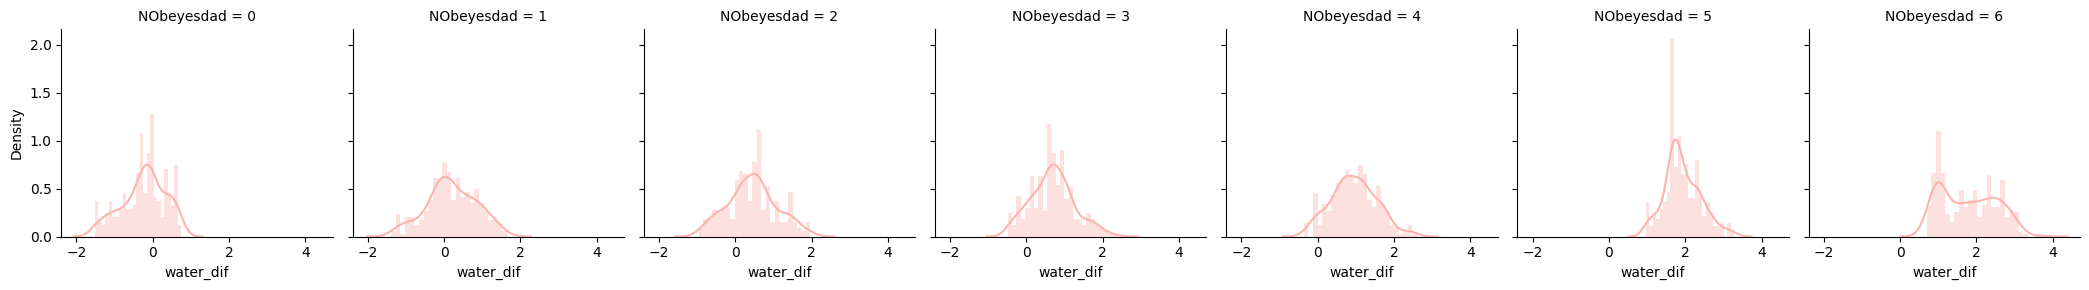

In [ ]:
g = sns.FacetGrid(df, col = 'NObeyesdad')
g.map(sns.distplot, 'water_dif', bins = 25)
plt.show()

🔹**water_dif :** The difference between the amount of water that should be drunk daily and the amount of water that is drunk </b>

📌 Water_dif feature being 0 indicates that the required amount of water is drunk. If this value is negative, it means that less amount of water is drunk than necessary, and if it is positive, it means that more amount of water is drunk than necessary.

📌 If we look at the tables, we see that as obesity levels increase, people consume more water than the amount of water they should drink.

### <b><span style='color: #96c93b'> |</span> BMI - SCC - family_history_with_overweight - Gender </b>

* black(0): Female
* pink(1): Male

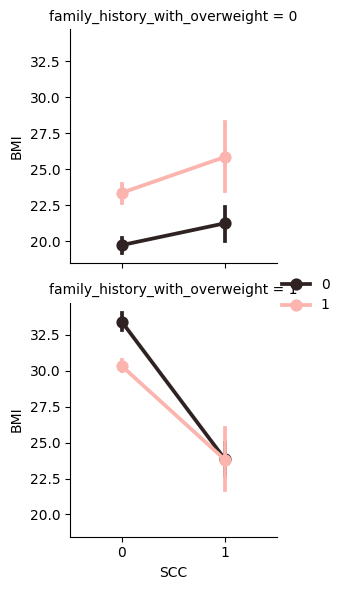

In [ ]:
g = sns.FacetGrid(df, row = 'family_history_with_overweight')
g.map(sns.pointplot, 'SCC','BMI','Gender')
g.add_legend()
plt.show()

📌 We have already seen that the family_history_with_overweight feature is related to the obesity level and the body mass index associated with it. We can see the difference here too.

📌 However, we see that monitoring calorie consumption reduces BMI in both genders, even if there is a family history of obesity.

### <b><span style='color: #96c93b'> |</span> NObeyesdad - Gender - Age</b>

* 0: Female
* 1: Male

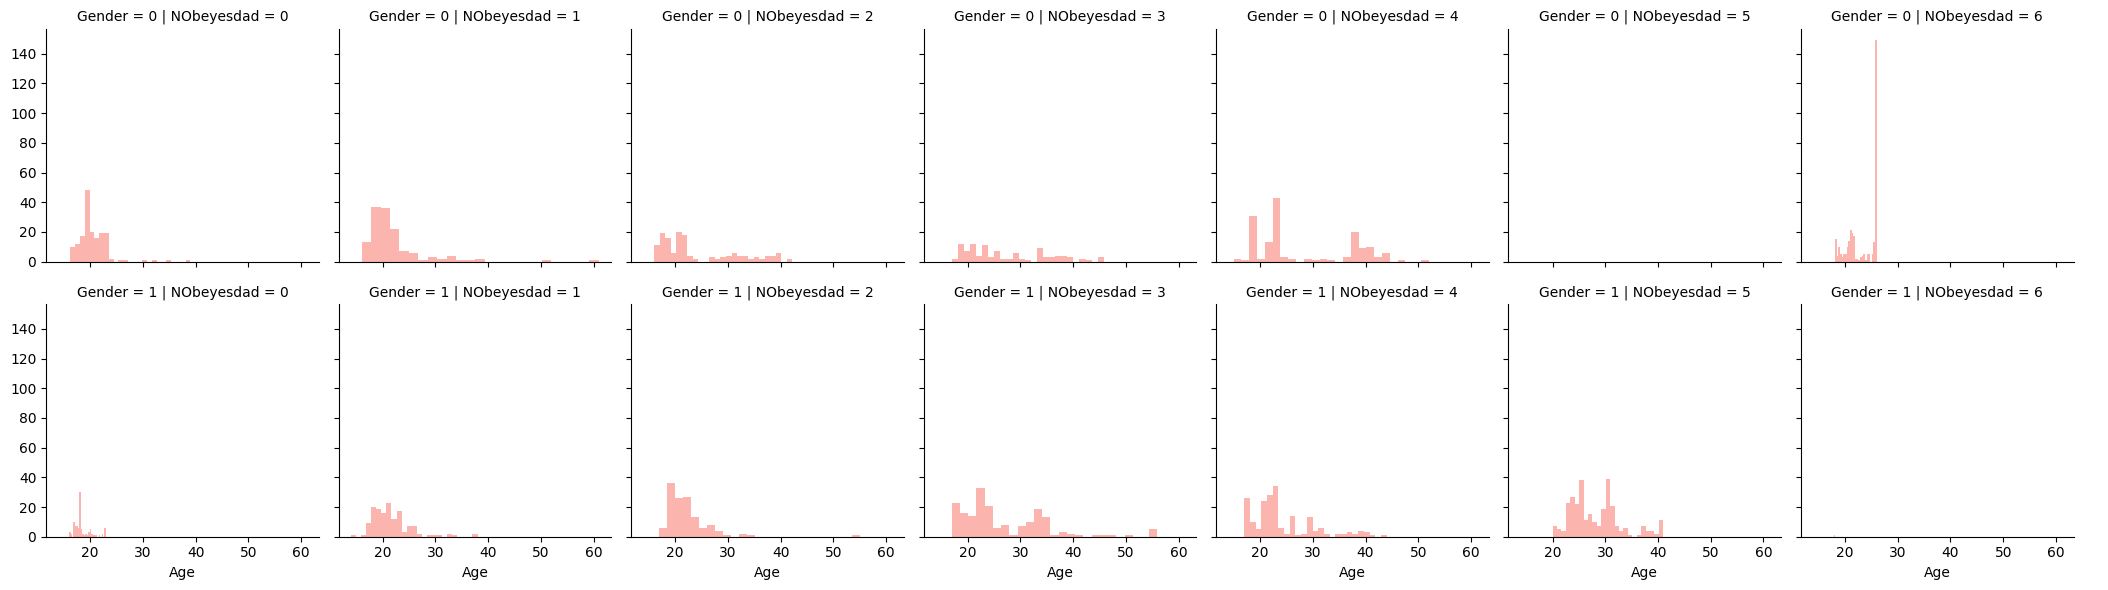

In [ ]:
g = sns.FacetGrid(df, col = 'NObeyesdad', row = 'Gender')
g.map(plt.hist, 'Age', bins = 25)
g.add_legend()
plt.show()

📌 **NOTES:**

* **1. 2. columns:** The number of insufficient weight and normal weight people in their 20s is higher in females than in males.

* **3.column:** People with Overweight_Level_I are more common in females and males in their 20s, but are distributed up to the 40s. However, most of the males with Overweight_Level_I are in their 20s.

* **4.column:** Overweight_Level_II is more common in males and females in their 20s and 35s. The Overweight_Level_II ratio in males within these ranges is higher than in females.

* **5.column:**  Obesity Type I is more common in females in their 25s and 40s, and in males in their 25s.

* **6.column:** While Obesity_Type_II is not seen in almost any age group in females, it is much more common in males in their 25s and 30s.  

* **7.column:** Obesity_Type_III has a density in females in their 20s and a serious excess in those aged approximately 25, while it is almost not seen in males in any age range.  

### <b><span style='color: #96c93b'> |</span> NObeyesdad - Age - MTRANS </b>

🔹**MTRANS**
* Public_Transportation : 4
* Automobile : 3           
* Walking : 2  
* Motorbike : 1
* Bike : 0  

🔹**NObeyesdad**
* Obesity_Type_III : 6   
* Obesity_Type_II : 5    
* Obesity_Type_I : 4      
* Overweight_Level_II : 3
* Overweight_Level_I : 2
* Normal_Weight : 1      
* Insufficient_Weight : 0

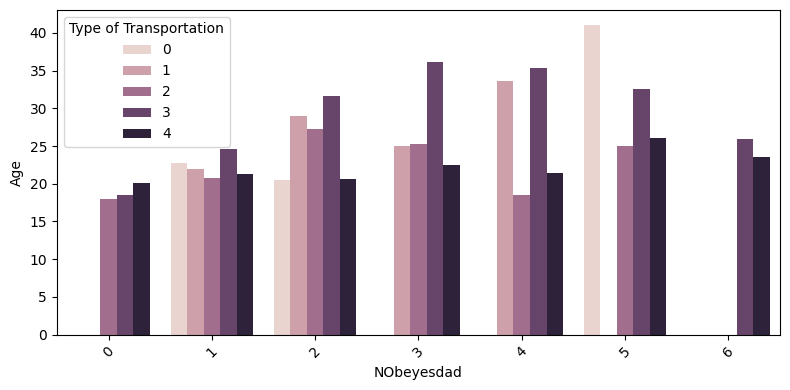

In [ ]:
plt.figure(figsize=(8, 4))

sns.barplot(data=df, x='NObeyesdad', y='Age', hue='MTRANS', ci=None)

plt.xlabel('NObeyesdad')
plt.ylabel('Age')

plt.xticks(rotation=45)

plt.legend(title='Type of Transportation')

plt.tight_layout()
plt.show()

📌**NOTES:**

* People with Obesity Type III do not use bicycle, walking or motorcycle transportation in any age group.
* People with Obesity Type II mostly ride bicycles, then motorcycles, and then cars.

## <b><span style='color: #9ed4db'> 5.2|</span> Causation</b>

In this section, we will examine whether various features are important in predicting the 'NObeyesdad' feature using the Granger Causality test.

> The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.

> This test uses the following null and alternative hypotheses:
> **Null Hypothesis (H0):** Time series x does not Granger-cause time series y
> **Alternative Hypothesis (HA):** Time series x Granger-causes time series y

> The term “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period.
> This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

https://www.statology.org/granger-causality-test-in-python/

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
grangercausalitytests(df[['NObeyesdad', 'CALC']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0212  , p=0.3821  , df_denom=2077, df_num=3
ssr based chi2 test:   chi2=3.0740  , p=0.3804  , df=3
likelihood ratio test: chi2=3.0717  , p=0.3807  , df=3
parameter F test:         F=1.0212  , p=0.3821  , df_denom=2077, df_num=3


{np.int64(3): ({'ssr_ftest': (np.float64(1.0212297801560855),
    np.float64(0.3821389462101007),
    np.float64(2077.0),
    np.int64(3)),
   'ssr_chi2test': (np.float64(3.07401472582371),
    np.float64(0.3803537434244174),
    np.int64(3)),
   'lrtest': (np.float64(3.071749782349798),
    np.float64(0.38069452216670624),
    np.int64(3)),
   'params_ftest': (np.float64(1.0212297801547603),
    np.float64(0.38213894621073463),
    np.float64(2077.0),
    3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(df[['NObeyesdad', 'water_dif']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4406  , p=0.7240  , df_denom=2077, df_num=3
ssr based chi2 test:   chi2=1.3262  , p=0.7229  , df=3
likelihood ratio test: chi2=1.3258  , p=0.7230  , df=3
parameter F test:         F=0.4406  , p=0.7240  , df_denom=2077, df_num=3


{np.int64(3): ({'ssr_ftest': (np.float64(0.44057994562789593),
    np.float64(0.7240015724267509),
    np.float64(2077.0),
    np.int64(3)),
   'ssr_chi2test': (np.float64(1.3261944246825255),
    np.float64(0.7229225484892858),
    np.int64(3)),
   'lrtest': (np.float64(1.3257726286483376),
    np.float64(0.7230223984634916),
    np.int64(3)),
   'params_ftest': (np.float64(0.4405799456259329),
    np.float64(0.7240015724281172),
    np.float64(2077.0),
    3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(df[['NObeyesdad', 'family_history_with_overweight']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4659  , p=0.2219  , df_denom=2077, df_num=3
ssr based chi2 test:   chi2=4.4125  , p=0.2202  , df=3
likelihood ratio test: chi2=4.4078  , p=0.2207  , df=3
parameter F test:         F=1.4659  , p=0.2219  , df_denom=2077, df_num=3


{np.int64(3): ({'ssr_ftest': (np.float64(1.4658847195477782),
    np.float64(0.22193658577717473),
    np.float64(2077.0),
    np.int64(3)),
   'ssr_chi2test': (np.float64(4.4124753329863795),
    np.float64(0.2202314181219237),
    np.int64(3)),
   'lrtest': (np.float64(4.407810625802995),
    np.float64(0.22066225260530783),
    np.int64(3)),
   'params_ftest': (np.float64(1.4658847195467597),
    np.float64(0.2219365857774616),
    np.float64(2077.0),
    3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(df[['NObeyesdad', 'BMI']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0973  , p=0.3490  , df_denom=2077, df_num=3
ssr based chi2 test:   chi2=3.3030  , p=0.3472  , df=3
likelihood ratio test: chi2=3.3003  , p=0.3476  , df=3
parameter F test:         F=1.0973  , p=0.3490  , df_denom=2077, df_num=3


{np.int64(3): ({'ssr_ftest': (np.float64(1.0972878339073515),
    np.float64(0.349030019109386),
    np.float64(2077.0),
    np.int64(3)),
   'ssr_chi2test': (np.float64(3.3029578900282917),
    np.float64(0.3472311736460458),
    np.int64(3)),
   'lrtest': (np.float64(3.300343202545264),
    np.float64(0.34759488018458573),
    np.int64(3)),
   'params_ftest': (np.float64(1.0972878339056913),
    np.float64(0.3490300191100954),
    np.float64(2077.0),
    3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

📌 Most of the results we found high in correlation showed that there was no causation in the Granger Causality test, except for the 'water_dif' feature. However, the features for which we found an average correlation also showed that there was causation between fetuses in the Granger Causality test. This may be due to the different distribution and variance properties of the variables or the relationship between these features may be indirect or more complex. These may affect the results of the Granger causality test.

# <b><span style='color: #f5ad9f'> 6|</span> Preprocessing (One-Hot Encoding and Standard Scaler)</b>

In this section, we will apply encoding for our categorical features and scaling for our numerical features. We create this as a help pipeline.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)])

In [ ]:
# Create Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data
X_transformed = pipeline.fit_transform(X)

In [ ]:
# Extract the feature names for categorical features
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# Concatenate numeric column names with categorical feature names
all_feature_names = numeric_cols + list(categorical_feature_names)

# Convert transformed data to a DataFrame
X = pd.DataFrame(X_transformed, columns=all_feature_names)

# <b><span style='color: #f5ad9f'> 7|</span> Model Development</b>

* In this section, we will use 3 models. LGBM Classifier, XGB Classifier, CatBoost Classifier. In my previous notebook, LGBM Classifier gave the best results. However, after the changes in this notebook, XGB Classifier gives better results.

* Finally, we will apply Stacking Classifier, an ensemble learning model.



* **7.1** Load the Libraries
* **7.2** LGBM Classifier (hypermeter tuning)
* **7.3** XGB Classifier (hypermeter tuning)
* **7.4** CatBoost Classifier (hypermeter tuning)
* **7.5** Stacking Classifier (Ensemble)

## <b><span style='color: #9ed4db'> 7.1|</span> Load the Libraries</b>

In [ ]:
!pip install catboost
!pip install Optuna

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier
import xgboost as xgb
import catboost as cb
from catboost import Pool

from optuna.samplers import TPESampler
import optuna

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1669, 31)
X_test shape: (418, 31)
y_train shape: (1669,)
y_test shape: (418,)


## <b><span style='color: #9ed4db'> 7.2|</span> LGBM Classifier (Hyperparameter Tuning)</b>

In [ ]:
best_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.01876712073426931,
    'n_estimators': 419,
    'lambda_l1': 0.009313559437420627,
    'lambda_l2': 0.038773850710543845,
    'max_depth': 6,
    'num_leaves': 45,
    'colsample_bytree': 0.36643404778652144,
    'subsample': 0.8965697292922784,
    'min_child_samples': 26
}

In [ ]:
lgbm_classifier = LGBMClassifier(**best_params)

lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9617224880382775

## <b><span style='color: #9ed4db'> 7.3|</span> XGB Classifier (Hyperparameter Tuning)</b>

In [ ]:
best_params2 = {'booster' : 'gbtree',
                'objective': 'multi:softmax',
                'verbosity' : 0,
                'tree_method' : "hist",
                'max_depth': 6,
                'learning_rate': 0.04497658670208754,
                'n_estimators': 366,
                'gamma': 0.002800024141530852,
                'min_child_weight': 2.480933321536105e-07,
                'subsample': 0.768632799287001,
                'colsample_bytree': 0.5526098554131518,
                'reg_alpha': 0.0010473611571215269,
                'reg_lambda': 0.49607928387141825,
                'eval_metric': 'mlogloss'}

In [ ]:
xgb_classifier = xgb.XGBClassifier(**best_params2)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9641148325358851

## <b><span style='color: #9ed4db'> 7.4|</span> CatBoost Classifier (Hyperparameter Tuning)</b>

In [ ]:
best_params3 = {'iterations': 953,
                'depth': 6,
                'learning_rate': 0.09824912127635886,
                'random_strength': 18,
                'bagging_temperature': 0.027325563890724644,
                'border_count': 159,
                'l2_leaf_reg': 0.5810014509693859}

In [ ]:
catb_classifier = cb.CatBoostClassifier(**best_params3)

catb_classifier.fit(X_train, y_train)

y_pred = catb_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0:	learn: 1.8517592	total: 35.4ms	remaining: 33.7s
1:	learn: 1.7662150	total: 58ms	remaining: 27.6s
2:	learn: 1.6500066	total: 84.9ms	remaining: 26.9s
3:	learn: 1.5725728	total: 111ms	remaining: 26.4s
4:	learn: 1.5625098	total: 126ms	remaining: 23.8s
5:	learn: 1.4583431	total: 148ms	remaining: 23.4s
6:	learn: 1.3715104	total: 173ms	remaining: 23.4s
7:	learn: 1.3405498	total: 196ms	remaining: 23.2s
8:	learn: 1.2688586	total: 223ms	remaining: 23.4s
9:	learn: 1.1743976	total: 254ms	remaining: 24s
10:	learn: 1.1221992	total: 274ms	remaining: 23.5s
11:	learn: 1.0698037	total: 298ms	remaining: 23.3s
12:	learn: 1.0507208	total: 321ms	remaining: 23.2s
13:	learn: 1.0060614	total: 342ms	remaining: 23s
14:	learn: 0.9793378	total: 366ms	remaining: 22.9s
15:	learn: 0.9234657	total: 389ms	remaining: 22.8s
16:	learn: 0.8978192	total: 408ms	remaining: 22.4s
17:	learn: 0.8732784	total: 421ms	remaining: 21.8s
18:	learn: 0.8395526	total: 442ms	remaining: 21.7s
19:	learn: 0.8164800	total: 467ms	remaining:

0.9736842105263158

## <b><span style='color: #9ed4db'> 7.5|</span> Stacking Classifier</b>

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
estimators = [('xgb', xgb_classifier), ('catboost', catb_classifier),('lgbm', lgbm_classifier)]

In [ ]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

In [ ]:
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)

Streaming output truncated to the last 5000 lines.
719:	learn: 0.0041225	total: 7.93s	remaining: 2.57s
720:	learn: 0.0041152	total: 7.95s	remaining: 2.56s
721:	learn: 0.0041118	total: 7.98s	remaining: 2.55s
722:	learn: 0.0041050	total: 8s	remaining: 2.55s
723:	learn: 0.0040986	total: 8.03s	remaining: 2.54s
724:	learn: 0.0040858	total: 8.05s	remaining: 2.53s
725:	learn: 0.0040754	total: 8.08s	remaining: 2.53s
726:	learn: 0.0040722	total: 8.1s	remaining: 2.52s
727:	learn: 0.0040663	total: 8.12s	remaining: 2.51s
728:	learn: 0.0040633	total: 8.13s	remaining: 2.5s
729:	learn: 0.0040540	total: 8.15s	remaining: 2.49s
730:	learn: 0.0040511	total: 8.18s	remaining: 2.48s
731:	learn: 0.0040472	total: 8.2s	remaining: 2.48s
732:	learn: 0.0040408	total: 8.22s	remaining: 2.47s
733:	learn: 0.0040358	total: 8.25s	remaining: 2.46s
734:	learn: 0.0040298	total: 8.27s	remaining: 2.45s
735:	learn: 0.0040240	total: 8.31s	remaining: 2.45s
736:	learn: 0.0040186	total: 8.33s	remaining: 2.44s
737:	learn: 0.00401

📌 Stacking Model Accuracy: 0.9688995215311005 LGBM + XGB + CatBoost